<a href="https://colab.research.google.com/github/mk05679/EDA-Analysis/blob/main/Haberman_Survival_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download Haberman Cancer Survival dataset from Kaggle.(https://www.kaggle.com/gilsousa/habermans-survival-data-set) 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')
df=pd.read_csv('haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])
df.head()

,age,operation_Year,axil_nodes,survival_status
0,age,year,nodes,status
1,30,64,1,1
2,30,62,3,1
3,30,65,0,1
4,31,59,2,1


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.

In [2]:
df = df.iloc[1:]
df.head()

,age,operation_Year,axil_nodes,survival_status
1,30,64,1,1
2,30,62,3,1
3,30,65,0,1
4,31,59,2,1
5,31,65,4,1


Basic High Level Statistics

In [3]:
print(df.columns)

Index(['age', 'operation_Year', 'axil_nodes', 'survival_status'], dtype='object')


In [4]:
print(df.shape)

(306, 4)


In [5]:
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

### 1.2 - Objective of the problem.
Given dataset is binary classi cation problem, to  nd whether the patient survived after 5 years or
not.
The main objective is to perform the task of EDA and to  nd the important features.

In [6]:
# An overview of the data
df.describe()

,age,operation_Year,axil_nodes,survival_status
count,306,306,306,306
unique,49,12,31,2
top,52,58,0,1
freq,14,36,136,225


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 1 to 306
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              306 non-null    object
 1   operation_Year   306 non-null    object
 2   axil_nodes       306 non-null    object
 3   survival_status  306 non-null    object
dtypes: object(4)
memory usage: 9.7+ KB


In [8]:
df['survival_status'] = df['survival_status'].astype(int)
df['age'] = df['age'].astype(int)
df['axil_nodes'] = df['axil_nodes'].astype(int)
df['operation_Year'] = df['operation_Year'].astype(int)

**Observations**
1. Dataset contains 306 points and 4 columsn
2. the 4 columns are age, survival status, nodes and operation year
3. 2 class calssification problem
4. imbalanced dataset with 225 points in class 1 and 81 in class 2
5. there is no missing value in the dataset
6. All 4 features are numerical


### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots

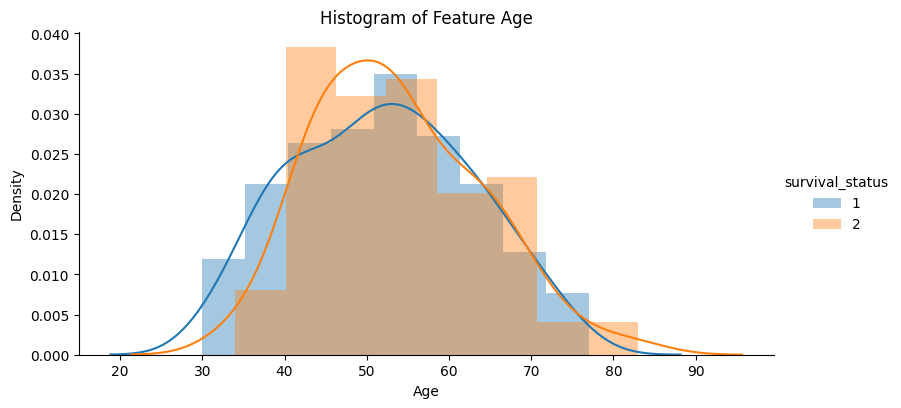

In [9]:
sns.FacetGrid(df, hue= 'survival_status',height = 4, aspect = 2)\
.map(sns.distplot,'age')\
.add_legend()
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Histogram of Feature Age')
plt.show()

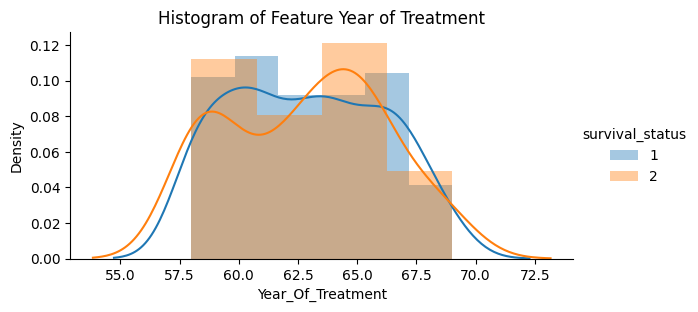

In [10]:
sns.FacetGrid(df, hue= 'survival_status',height= 3, aspect = 2).map(sns.distplot, 'operation_Year').add_legend()

plt.xlabel('Year_Of_Treatment')
plt.ylabel('Density')
plt.title('Histogram of Feature Year of Treatment')
plt.show()

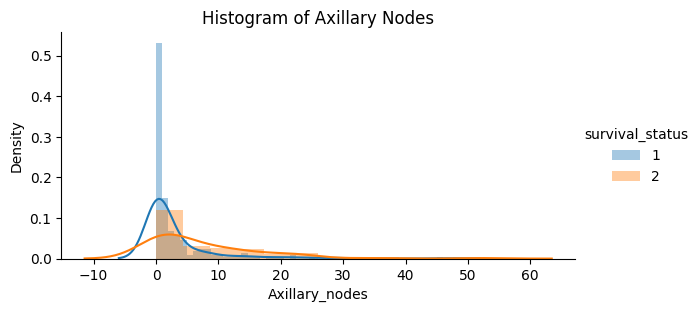

In [11]:
sns.FacetGrid(df, hue= 'survival_status', height = 3, aspect = 2).map(sns.distplot, 'axil_nodes').add_legend()
plt.xlabel('Axillary_nodes')
plt.ylabel('Density')
plt.title('Histogram of Axillary Nodes')
plt.show()

Observations:
1. Patients with age < 35 years have a higher chance of survival
2. Patients with age > 75 years have lesser chance of survival
3. 100 % probability of survival , if axillary nodes = 0
4. More the nodes, lesser the survvial

PDF's and CDF's

In [12]:
survival_1 = df.loc[(df['survival_status']==1)]
survival_2 = df.loc[(df['survival_status']==2)]

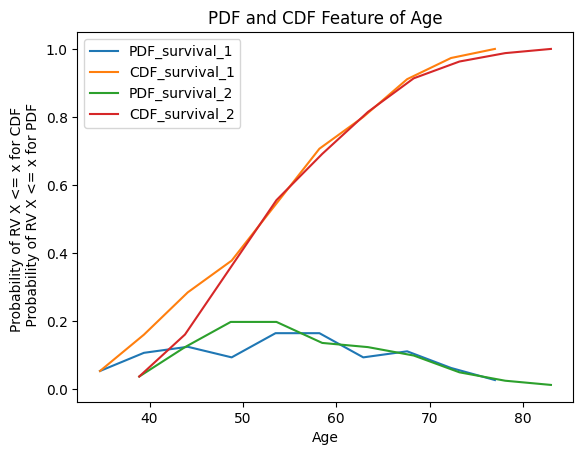

In [13]:
counts, bin_edges = np.histogram(survival_1['age'], bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(survival_2['age'], bins =10, density= True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend(['PDF_survival_1', 'CDF_survival_1', 'PDF_survival_2','CDF_survival_2'])
plt.title("PDF and CDF Feature of Age")
plt.xlabel('Age')
plt.ylabel('Probability of RV X <= x for CDF \n Probability of RV X <= x for PDF')
plt.show()

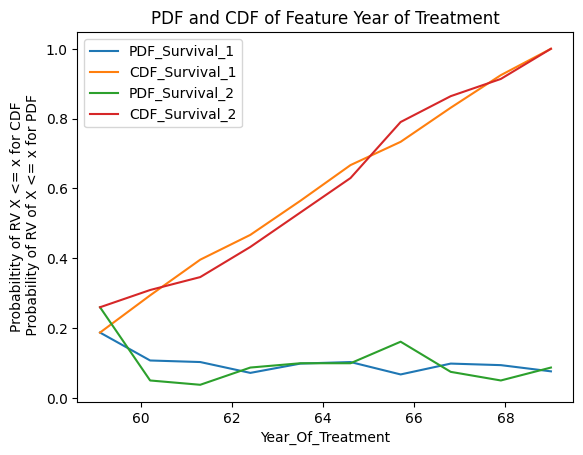

In [14]:
counts, bin_edges = np.histogram(survival_1['operation_Year'], bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(survival_2['operation_Year'], bins= 10, density = True)
pdf = counts/sum(counts)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend(['PDF_Survival_1','CDF_Survival_1','PDF_Survival_2','CDF_Survival_2'])
plt.title("PDF and CDF of Feature Year of Treatment")
plt.xlabel('Year_Of_Treatment')
plt.ylabel('Probabiltity of RV X <= x for CDF\n Probability of RV of X <= x for PDF')
plt.show()

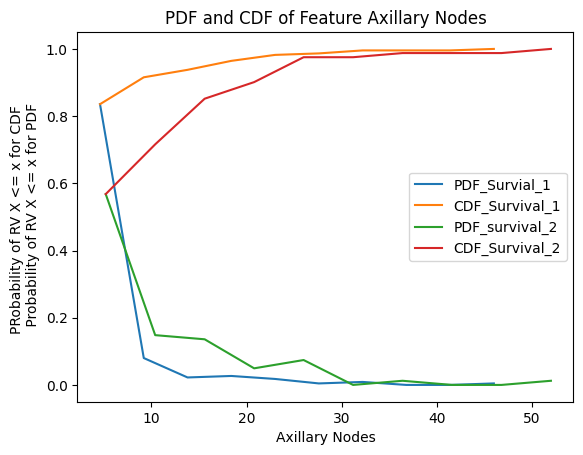

In [15]:
counts, bin_edges = np.histogram(survival_1['axil_nodes'], bins = 10, density =True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(survival_2['axil_nodes'], bins = 10, density=True)
pdf = counts/sum(counts)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

plt.legend(['PDF_Survial_1', 'CDF_Survival_1','PDF_survival_2','CDF_Survival_2'])
plt.title('PDF and CDF of Feature Axillary Nodes')
plt.xlabel('Axillary Nodes')
plt.ylabel('PRobability of RV X <= x for CDF \n Probability of RV X <= x for PDF')

plt.show()


Observations
1. Patients with age > 75 years did not survive
2. Patients with age < 35 years survived.
3. 82% survived patients if axillary nodes lie in the range[0,5]
4. All the patients with more than 45 axillary nodes did not survive

## Box Plots

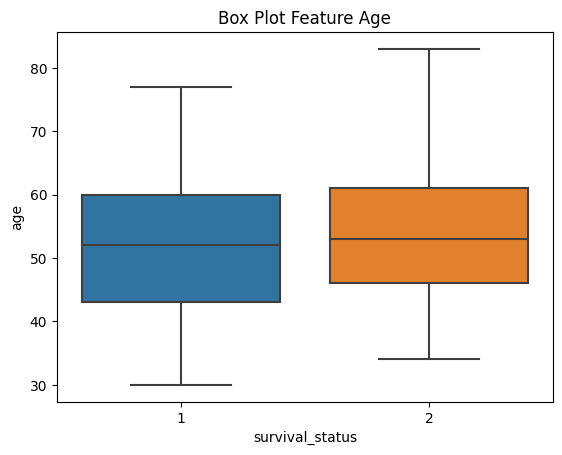

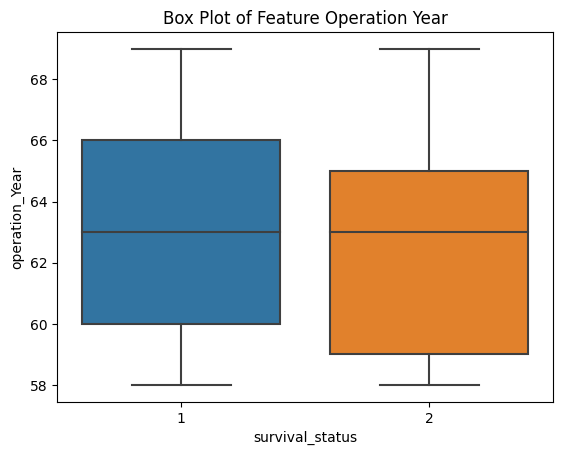

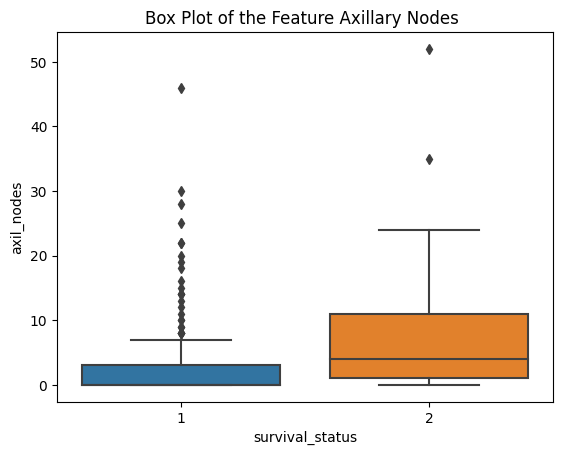

In [16]:
sns.boxplot(x = 'survival_status', y = 'age', data = df)
plt.title('Box Plot Feature Age')
plt.show()

sns.boxplot(x = 'survival_status', y = 'operation_Year', data = df)
plt.title('Box Plot of Feature Operation Year')
plt.show()

sns.boxplot(x = 'survival_status', y = 'axil_nodes', data= df)
plt.title('Box Plot of the Feature Axillary Nodes ')
plt.show()

Observations:
1. 25% of Patients survied are below age 42
2. 25% of patients who did not survive are below age of 49
3. for survived patients, 75% had less than 5 nodes
5. for non survived patiients, 75% had more than 4 axillary nodes

## **Violin Plots**

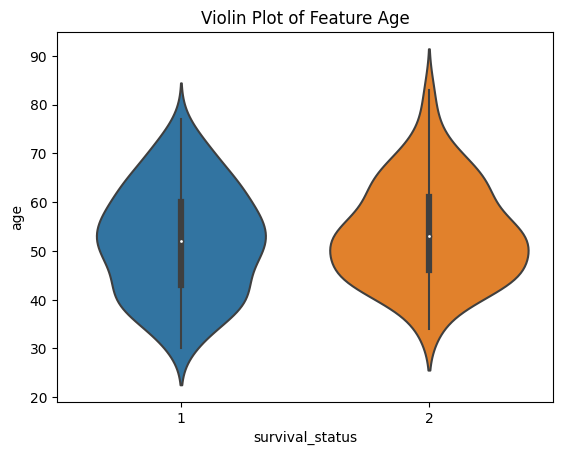

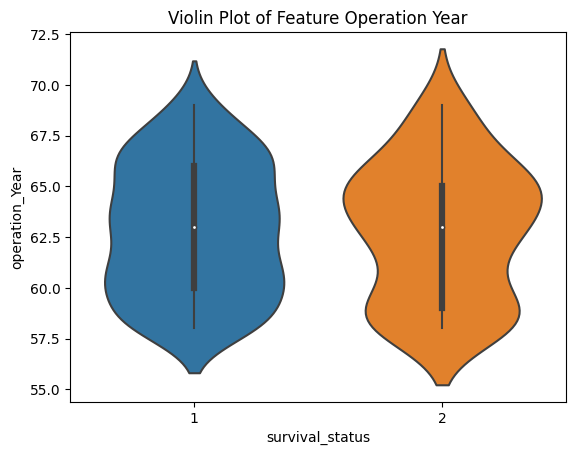

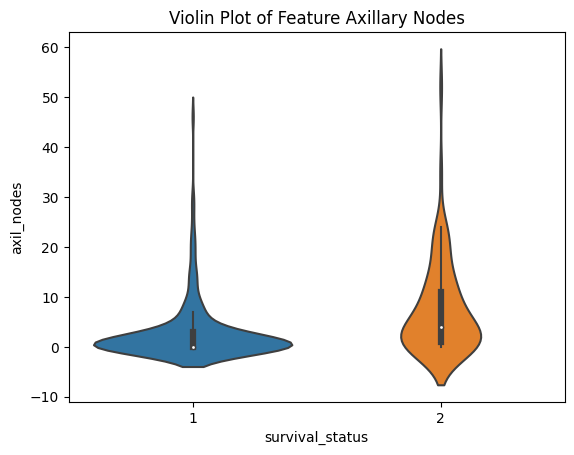

In [17]:
sns.violinplot(x= 'survival_status', y = 'age', data= df)
plt.title('Violin Plot of Feature Age')
plt.show()

sns.violinplot(x = 'survival_status', y= 'operation_Year', data= df)
plt.title('Violin Plot of Feature Operation Year')
plt.show()

sns.violinplot(x= 'survival_status', y = 'axil_nodes', data= df)
plt.title('Violin Plot of Feature Axillary Nodes')
plt.show()

Observations:
The spread of points for survival is more at 0 and less at 2

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots

## Plot 2D Scatter Plots

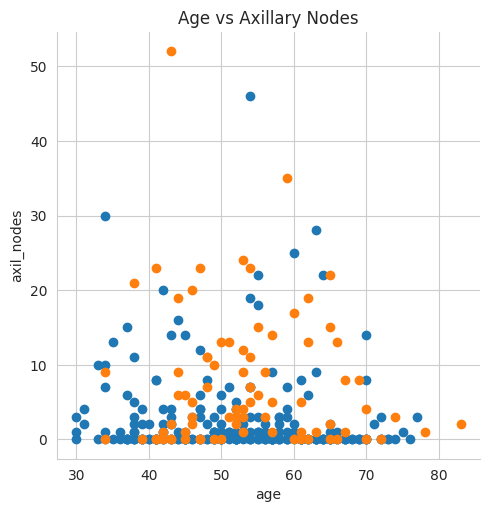

In [19]:
sns.set_style('whitegrid')
sns.FacetGrid(df, hue= 'survival_status', height = 5).map(plt.scatter, 'age', 'axil_nodes')
plt.title("Age vs Axillary Nodes")
plt.show()

Observations
If the age < 40, the chance of survival is high

## Pair Plot

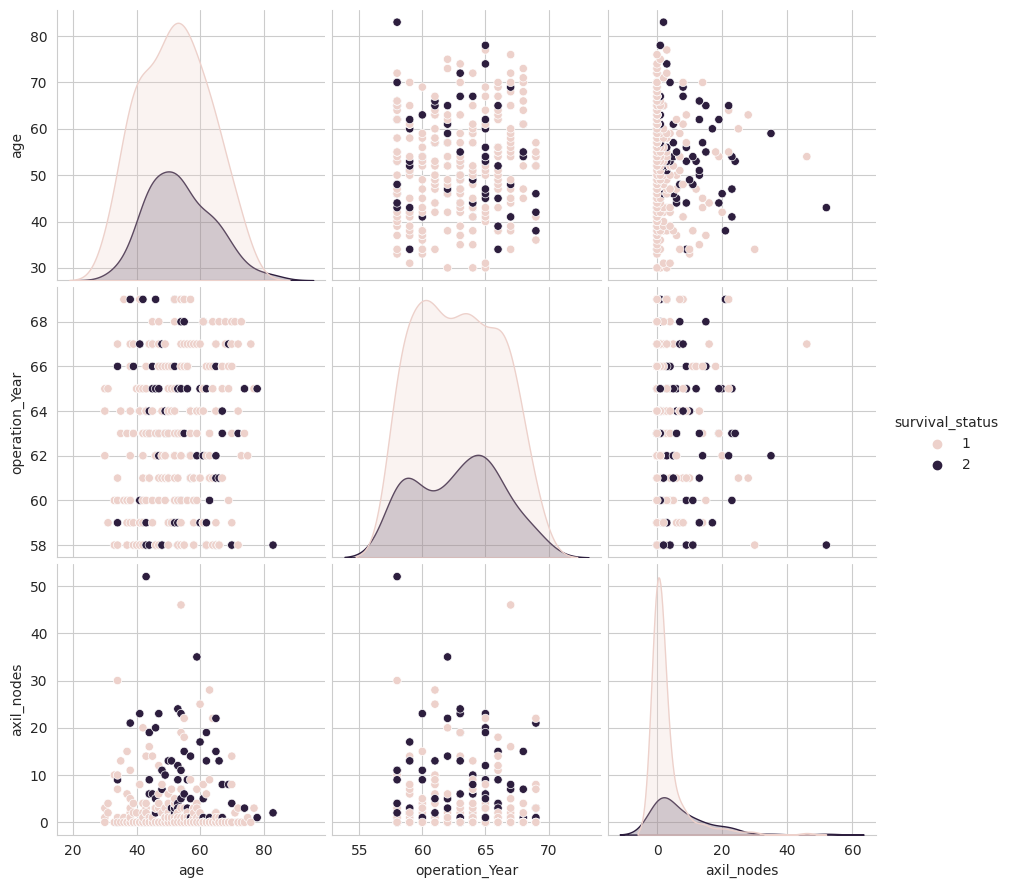

In [20]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(df, hue = 'survival_status', size = 3)
plt.show()

Observations

If the Age <= 37, and axillary nodes < 9 , then patient survival is 95%


## Multivariant Probabiltiy Density Plot, Contour

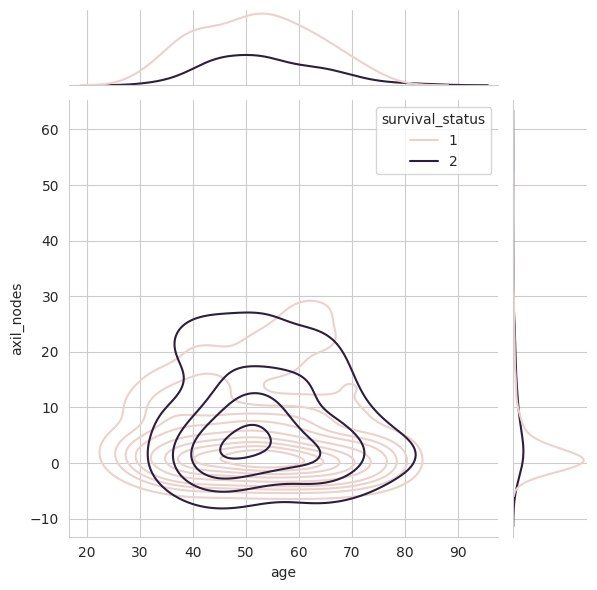

In [21]:
plt.close()
sns.set_style('whitegrid')
sns.jointplot(x = 'age', y = 'axil_nodes', data = df, kind= 'kde', hue= 'survival_status')
plt.show()

### 1.5 Summarization of final conclusions of the Exploration

1. Patients with age < 35 years have an higher chance of survival
2. Patients with age > 75 years have lesser chance of survival
3. 100% probablitity of survival, if axillary nodes = 0.
4. More the nodes, lesser the survival
5. 25% of patients survived are below 42 years of age
 . 25% of patients of patients who did not survive are below the age of 49 years.
7. For Survived Patients, 75% had less then 5 nodes.
 . For Non- Survived Patients, 75% had more than 4 axillary nodes.
9. The spread of points in survival is more at 0 and of less survival is more than 2.